# Exploratory Analysis of Climate Data

Exploratory Data Analysis (EDA for short) refers to the process of discovering patterns and relationships within a dataset. It is about making sense of the data at hand and getting to know it before modeling or analysis. It is an important step prior to model building and can help us formulate further questions and areas for investigation. Within this project we are going work with the `training_data.csv` and `test_data.csv` provided by partners of [WiDS Datathon 2023](https://www.kaggle.com/competitions/widsdatathon2023/data).

The goals of EDA are:

- Uncover the data structure and determine how it is coded;
- Inspect and “get to know” the data by summarizing and visualizing it;
- Detect outliers, missing data, and other anomalies and decide how/whether to address these issues;
- Find new avenues for analysis and further research;
- Prepare for model building or analysis, including the following:
    - Check assumptions;
    - Select features;
    - Choose an appropriate method.


WiDS Datathon Overview:

"The WiDS Datathon 2023 focuses on a prediction task involving forecasting sub-seasonal temperatures (temperatures over a two-week period, in our case) within the United States. We are using a pre-prepared dataset consisting of weather and climate information for a number of US locations, for a number of start dates for the two-week observation, as well as the forecasted temperature and precipitation from a number of weather forecast models (we will reveal the source of our dataset after the competition closes). Each row in the corresponds to a single location and a single start date for the two-week period. Your task is to predict the arithmetic mean of the maximum and minimum temperature over the next 14 days, for each location and start date.

You are provided with two datasets:

`train_data.csv`: the training dataset, where `contest-tmp2m-14d__tmp2m`, the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date, computed as (measured max temperature + measured mini temperature) / 2".
`test_data.csv`: the test dataset, where we withhold the true value of `contest-tmp2m-14d__tmp2m` for each row".

With all tactic and strategic goals set let's start by importing some libraries and loading CSV into a DataFrame for inspection and gaining familiarity with the data.

## Data Inspection

In [1]:
# Basic imports related to analysis
import pandas as pd
import numpy as np

# Imports for visualisation
import seaborn as sns
from matplotlib import pyplot as plt

# Imports related to preprocessing
from preprocessing import location_nom

# Silence warnings
import warnings
warnings.filterwarnings("ignore")

Let's see first 5 rows of the training and testing datasets.

In [2]:
pd.set_option('display.max_columns', None)
train_data = pd.read_csv('datasets/train_data.csv')
train_data.head(5)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [3]:
test_data = pd.read_csv('datasets/test_data.csv')
test_data.head(5)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,w

What about the size of a table at hand?

In [4]:
print(f'Train_shape: {train_data.shape}    |  Test_shape: {test_data.shape}')

Train_shape: (375734, 246)    |  Test_shape: (31354, 245)


It is a fairly big dataset with `246` columns and `375734` rows in training set and `245` columns and `31354` rows in testing. Let's get a short technical overview of the datasets.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 705.2+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31354 entries, 0 to 31353
Columns: 245 entries, index to wind-vwnd-925-2010-20
dtypes: float64(241), int64(2), object(2)
memory usage: 58.6+ MB


Result: 
- The majority of the values have data type `float` which is a floating point number. We can notice that some of them are temperature data, some - predictions from other models and the rest are presumably wind speed values. 
- 2 of the columns contain data with the type `object`. One of them is visible from the start, it is a `startdate` and it contains a measurement beginning date. The other one we can find out using the function below.
- The dataset takes a lot of memory, so we won't be able to upload it to GitHub.

In [7]:
def check_dtype(dataset, dtype, num_values):
    l = []
    # Check each column for containing specified data type
    for x in dataset.columns:
        if dataset[x].dtype == dtype:
            l.append(dataset[x][:num_values])
    return l
        
check_dtype(train_data, 'object',3)

[0    9/1/14
 1    9/2/14
 2    9/3/14
 Name: startdate, dtype: object,
 0    BSh
 1    BSh
 2    BSh
 Name: climateregions__climateregion, dtype: object]

In [8]:
check_dtype(test_data, 'object',3)

[0    11/1/22
 1    11/2/22
 2    11/3/22
 Name: startdate, dtype: object,
 0    BSh
 1    BSh
 2    BSh
 Name: climateregions__climateregion, dtype: object]

Result: Besides `startdate`, the `object` data type has column `climateregions__climateregion`. Let's check short statistic for this value.

In [9]:
train_data.climateregions__climateregion.describe()

count     375734
unique        15
top          BSk
freq      139621
Name: climateregions__climateregion, dtype: object

Result: We can see that there are apparently no `NaN`s within this column, there are 15 unique values and the most frequently used (139621 times) is `BSk`. 

Let's proceed to the columns with the `int64` data type. There were 4 of them, let's check how they look and what are they.

In [10]:
check_dtype(train_data, 'int64', 3)

[0    0
 1    1
 2    2
 Name: index, dtype: int64,
 0    4
 1    4
 2    4
 Name: mjo1d__phase, dtype: int64,
 0    56
 1    56
 2    56
 Name: mei__meirank, dtype: int64,
 0    4
 1    4
 2    4
 Name: mei__nip, dtype: int64]

Now testing set. 

In [11]:
check_dtype(test_data, 'int64', 3)

[0    375734
 1    375735
 2    375736
 Name: index, dtype: int64,
 0    200
 1    200
 2    200
 Name: elevation__elevation, dtype: int64]

Seems like the same columns have `float` or `int` types in different datasets. Let's check to be sure. 

In [12]:
train_data.elevation__elevation.dtype

dtype('float64')

In [13]:
test_data.mjo1d__phase.dtype, test_data.mei__meirank.dtype, test_data.mei__nip.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

Result: seems like only `index` column has integers within itself in both datasets, other columns change their data types from `float64` to `int64`, which is fine for now.

Since we have a time series problem, let's change `startdate` to `datetime` format for easier handling.

In [14]:
# Change data type
train_data.startdate = pd.to_datetime(train_data.startdate)
test_data.startdate = pd.to_datetime(test_data.startdate)

# Check the resulting data type
train_data.startdate.dtype, test_data.startdate.dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

### Handling Missing Values

What about `NaN` values, how many of them we have in each column? Let's filter out only the columns which consist at least one `NaN` value.

In [15]:
def with_nans(dataset):
    # Find columns with NaN values and count such values
    with_nan = dataset.isna().sum()
    # Return appropriate message if no NaNs are found
    if with_nan[with_nan > 0].empty:
        print('No NaN values found.')
    else:
        return with_nan[with_nan > 0]

# Check training set for NaNs
with_nans(train_data)

nmme0-tmp2m-34w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
nmme-prate-34w__ccsm3       8738
nmme0-prate-56w__ccsm30    15934
nmme0-prate-34w__ccsm30    15934
nmme-prate-56w__ccsm3      10280
nmme-tmp2m-34w__ccsm3       8738
ccsm30                     15934
dtype: int64

In [16]:
# Check testing set for NaNs
with_nans(test_data)

No NaN values found.


Result: only training set contains `NaN`s, so let's see where exactly do they come across.

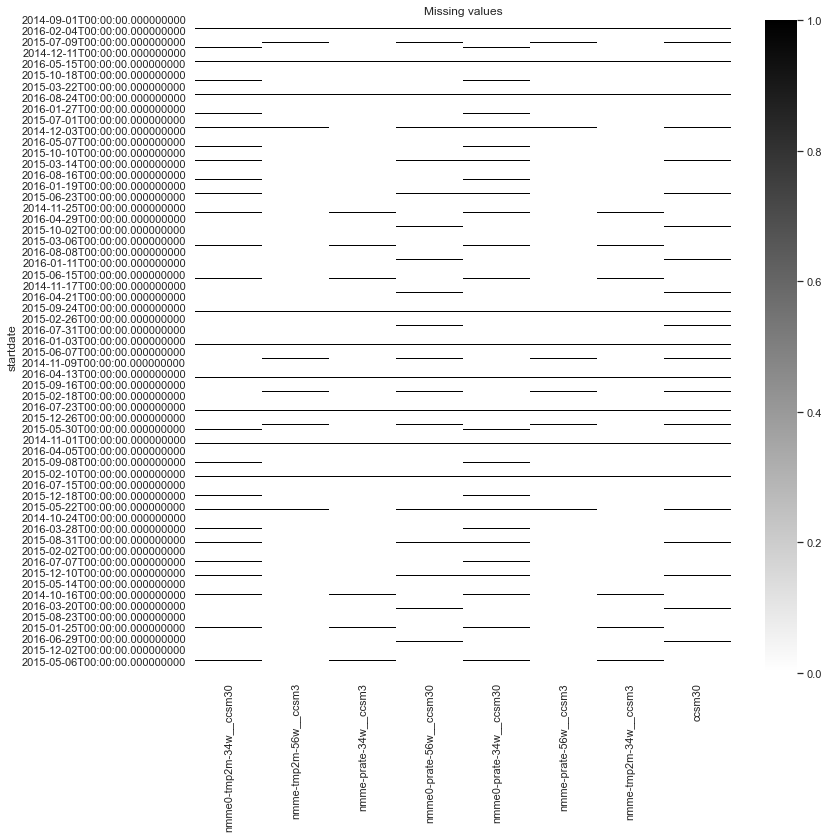

In [17]:
# Apply darkgrid to all plots 
sns.set(style='darkgrid')
# Create a list of columns that contain NaNs
cols_with_missing = list(train_data.isnull().sum(axis=0)[train_data.isnull().sum(axis=0) > 0].index)
# Set up grid
fig, ax = plt.subplots(1,1,figsize=(12,12))
# Plot the values
sns.heatmap(train_data.set_index(['startdate'])[cols_with_missing].isnull(), cmap='binary')
# Add title
ax.set_title('Missing values')
# Draw the plot
plt.show()

According to the data description, provided by organisators columns with prefixes `nmme` and `ccsm` are results gotten from other, probably physical, models. 

Some of these columns contain quite a great amount of `NaN`s within them, considering that we are dealing with time series data we can assume that a current value will be very close to the previous and the next one, so we are going to replace the `NaN`s with the values that stand right before each one of them. 

Note: just replacing with averages, in the case of time-series data, won't be of much help, because they change the values too drastically from one date to another.

In [18]:
# Replace each `NaN` with the value that stands right before it
def fill_na(df):
    df = df.sort_values(by=['startdate']).ffill()
    return df

train_data = fill_na(train_data)

# Check if any NaNs are left
with_nans(train_data)

No NaN values found.


### Start Date
Now with `NaN`s out of the way let's check what we have in `startdate` column. 

In [19]:
train_data.sort_values('startdate').startdate.head(3), train_data.sort_values('startdate').startdate.tail(3)

(0        2014-09-01
 127194   2014-09-01
 143276   2014-09-01
 Name: startdate, dtype: datetime64[ns],
 21198    2016-08-31
 152047   2016-08-31
 375733   2016-08-31
 Name: startdate, dtype: datetime64[ns])

In [20]:
test_data.sort_values('startdate').startdate.head(3), test_data.sort_values('startdate').startdate.tail(3)

(0       2022-11-01
 28365   2022-11-01
 19093   2022-11-01
 Name: startdate, dtype: datetime64[ns],
 21044   2022-12-31
 20251   2022-12-31
 31353   2022-12-31
 Name: startdate, dtype: datetime64[ns])

In [21]:
len(train_data.startdate.unique()), len(test_data.startdate.unique())

(731, 61)

Result: 
- Looks like training set contains 2 full years of info, starting from September 2014 and ending in August 2016. 
- On the other hand, training data starts in November 2022 and ends in December of the same year.

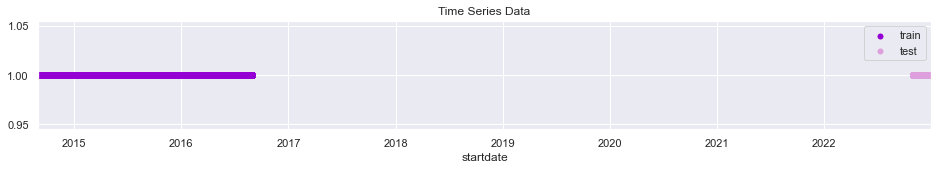

In [22]:
# Set up grid
fig, ax = plt.subplots(1,1, figsize=(16,2))
# Put data on the plots
sns.scatterplot(data = train_data, x = 'startdate', y = 1, linewidth=0, label='train', color='darkviolet')
sns.scatterplot(data = test_data, x = 'startdate', y = 1, linewidth=0, label='test', color='plum')
# Add title
ax.set_title('Time Series Data')
# Set up plot limits
ax.set_xlim([train_data['startdate'].iloc[0], test_data['startdate'].iloc[-1]])
# Show the result
plt.show()

This situation can cause us problems during model validation. One issue is that climate change was active during all these years and the temperatures were rising, so the difference might be quite notable, making validation set values a poorly achievable goal. The other issue is validation set takes into account only 2 months with quite low temperatures. Let's compare statistics of both datasets to check how they might differ.  

## Summarization and Comparison

In [23]:
train_data.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-20

In [24]:
test_data.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-2010-7,wind-uwnd-925-2010-8

Result: In a table format these stats look quite overwhelming, so let's plot them. 

### Temperature Predictions

We are going to display temperature predictions to see how they evolved. The values are contained within columns marked with `tmp2m` code. We are going to take only November and December 2015 from training and 2022 from testing sets to make comparison purer. 

In [25]:
def calc_stats(metric):
    # Slice the training set to reduce it to the available period of testing set
    slice_train = train_data[(train_data['startdate'] > '2015-11-01') & (train_data['startdate'] < '2015-12-31')]
    # Find means for training and testing 
    train_mean = slice_train.loc[:, slice_train.columns.str.contains(metric)].mean()
    test_mean = test_data.loc[:, test_data.columns.str.contains(metric)].mean()
    # Find maxes for training and testing 
    train_max = slice_train.loc[:, slice_train.columns.str.contains(metric)].max()
    test_max = test_data.loc[:, test_data.columns.str.contains(metric)].max()
    # Find mins for training and testing 
    train_min = slice_train.loc[:, slice_train.columns.str.contains(metric)].min()
    test_min = test_data.loc[:, test_data.columns.str.contains(metric)].min()
    
    return train_mean, test_mean, train_max, test_max, train_min, test_min

train_mean_t, test_mean_t, train_max_t, test_max_t, train_min_t, test_min_t = calc_stats(metric='tmp2m')

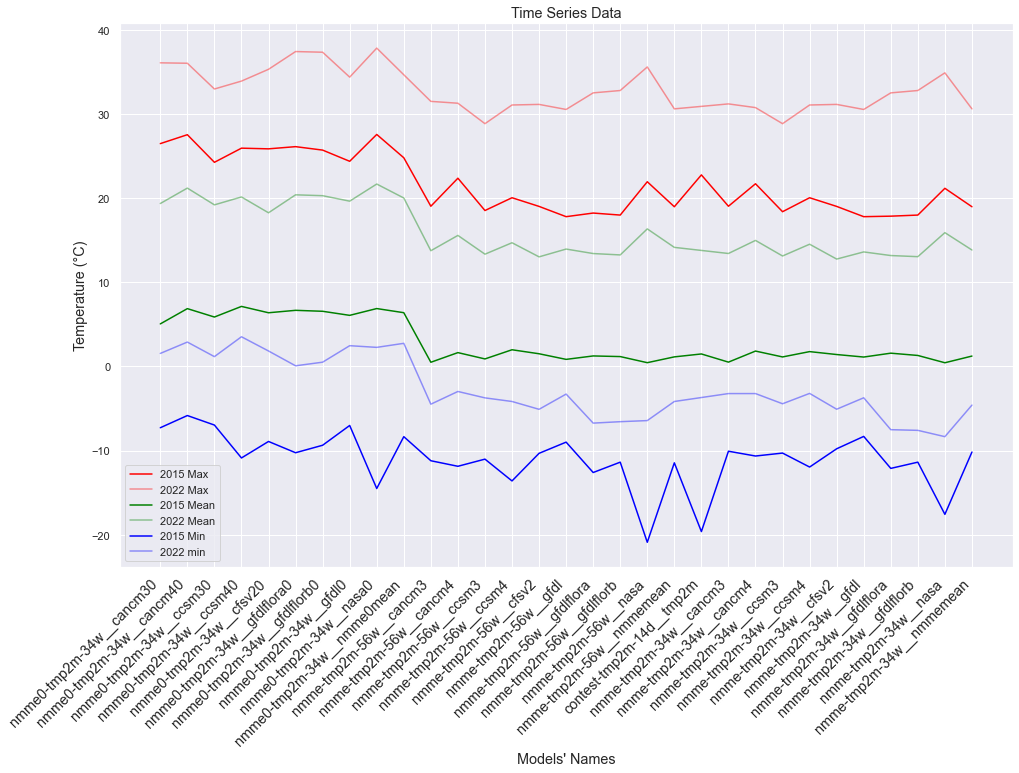

In [26]:
def compare_stats(train_mean, test_mean, train_max, test_max, train_min, test_min, mean_color, max_color, min_color, ylabel):
    # Set up grid
    fig, ax = plt.subplots(1,1, figsize=(16,10))
    # Plot each statistic
    sns.lineplot(data = train_max, color=max_color, label='2015 Max')
    sns.lineplot(data = test_max, color=max_color,  alpha=0.4, label='2022 Max')
    sns.lineplot(data = train_mean, color=mean_color, label='2015 Mean')
    sns.lineplot(data = test_mean, color=mean_color, alpha=0.4, label='2022 Mean')
    sns.lineplot(data = train_min, color=min_color, label='2015 Min')
    sns.lineplot(data = test_min, color=min_color,  alpha=0.4, label='2022 min')

    # Set up ticks
    ax.set_xticklabels(
        train_min.index,
        rotation=45, 
        horizontalalignment='right', 
        fontsize = 'large'
        )

    # Add plot descriptions
    ax.set_title('Time Series Data', fontsize = 'large')
    ax.set_ylabel(ylabel = ylabel, fontsize = 'large')
    ax.set_xlabel('Models\' Names', fontsize = 'large')

    return plt.show()

compare_stats(
    train_mean_t, test_mean_t, train_max_t, test_max_t, train_min_t, test_min_t, 
    mean_color='green', 
    max_color='red', 
    min_color='blue', 
    ylabel='Temperature (°C)')

Note: `34w` is the 3d and 4th week from the `startdate`, `56w` is the 5th and 6th respectively. At the end of the line is the name of a physical model.

Result:  all models' temperature predictions for all statistics and time periods have risen, most likely due to the climate change. 

### Precipitation Predictions

Let's see what we will get from precipitation predictors. Those contain `prate` code within their names.

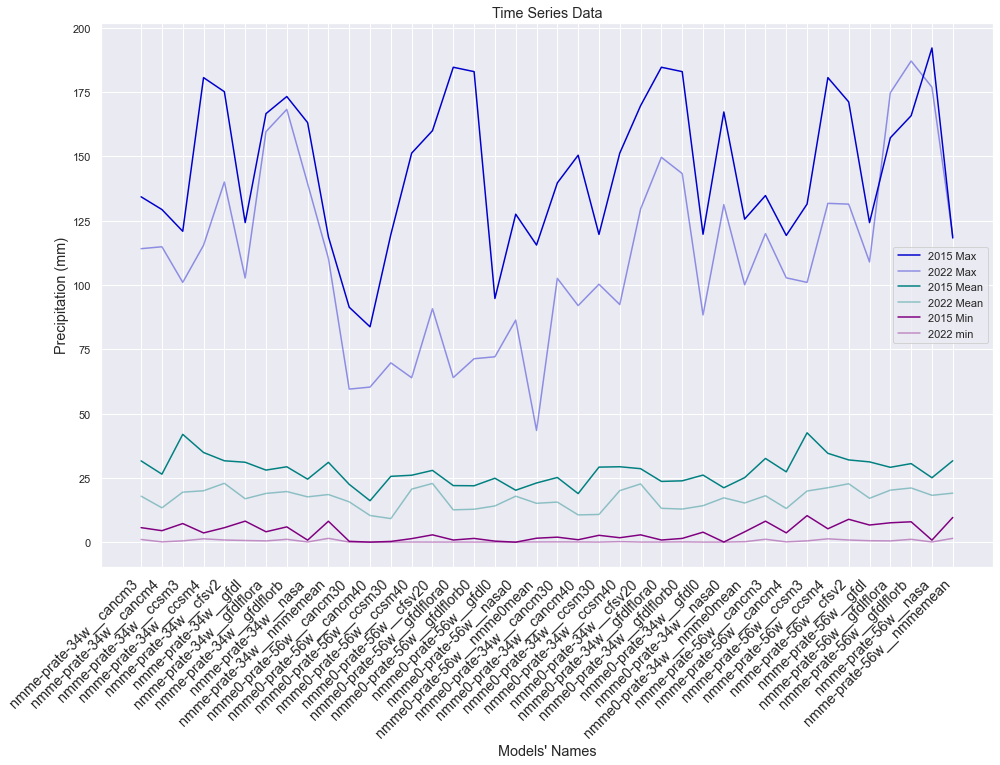

In [27]:
train_mean_p, test_mean_p, train_max_p, test_max_p, train_min_p, test_min_p = calc_stats(metric='prate')

compare_stats(
    train_mean_p, test_mean_p, train_max_p, test_max_p, train_min_p, test_min_p, 
    mean_color='Teal', 
    max_color='MediumBlue', 
    min_color='Purple', 
    ylabel='Precipitation (mm)')

Note: `34w` is the 3d and 4th week from the `startdate`, `56w` is the 5th and 6th respectively. At the end of the line is the name of a physical model.

Result: Precipitation has decreased in 2022 statistics, comparing to 2015, but not drastically and not for all models and time periods.

### Climate Region

We have categorical variable `regions`, which seems to inform us about the type of climate this region has. Let's count data points by region and add definitions, so those abbreviations would finally make sense to us. 

In [28]:
# Count the number of data points within each region
regions_train = train_data.climateregions__climateregion.value_counts().to_frame('Count')
# Find percentages ratio of data points for each region
regions_train['Percentage'] = regions_train['Count'] / regions_train['Count'].sum()

# Add definitions from the file
from mapping import map_to_def
# Add definitions to the dataframe
regions_train = map_to_def(regions_train).reset_index().rename(columns={'index':'Name'})
# Display the full length of each column
pd.set_option('display.max_colwidth', None)
# Display result
regions_train

,Name,Count,Percentage,Definition
0,BSk,139621,0.371595,Cold semi-arid climate
1,Dfb,52632,0.140078,Warm-summer humid continental climate
2,Cfa,51901,0.138132,Humid subtropical climate
3,Csb,40936,0.108949,Warm-summer Mediterranean climate
4,Dfa,22661,0.060311,Hot-summer humid continental climate
5,BWk,13889,0.036965,Cold desert climate
6,Dfc,12427,0.033074,Subarctic climate
7,Csa,9503,0.025292,Hot-summer Mediterranean climate
8,BWh,9503,0.025292,Hot desert climate
9,Dsb,8041,0.021401,Mediterranean-influenced warm-summer humid continental climate


What do we have in the test dataset? 

In [29]:
# Count the number of data points within each region
regions_test = test_data.climateregions__climateregion.value_counts().to_frame('Count')
# Find percentages ratio of data points for each region
regions_test['Percentage'] = regions_test['Count'] / regions_test['Count'].sum()
# Add definitions to the dataframe
regions_test = map_to_def(regions_test).reset_index().rename(columns={'index':'Name'})
# Display result
regions_test

,Name,Count,Percentage,Definition
0,BSk,11651,0.371595,Cold semi-arid climate
1,Dfb,4392,0.140078,Warm-summer humid continental climate
2,Cfa,4331,0.138132,Humid subtropical climate
3,Csb,3416,0.108949,Warm-summer Mediterranean climate
4,Dfa,1891,0.060311,Hot-summer humid continental climate
5,BWk,1159,0.036965,Cold desert climate
6,Dfc,1037,0.033074,Subarctic climate
7,BWh,793,0.025292,Hot desert climate
8,Csa,793,0.025292,Hot-summer Mediterranean climate
9,Dsb,671,0.021401,Mediterranean-influenced warm-summer humid continental climate


The tables look pretty similar, but let's check it using machine to be more confident.

In [30]:
print('Is the column "Name" the same for training and testing sets?', regions_train.Name.equals(regions_test.Name))
print('What about the column "Percentage"?', regions_train.Percentage.equals(regions_test.Percentage)) 
print('Column "Count"?', regions_train['Count'].equals(regions_test['Count']))

Is the column "Name" the same for training and testing sets? False
What about the column "Percentage"? True
Column "Count"? False


Result: 
- Number of data points is different, but percentages and devision by region is exactly the same for both datasets. 
- Also, the number of data points seems to be increasing in even batches from region to region: by 731 for training and by 61 for testing sets.
 
We can put the count info on a plot for the ease of comprehension.

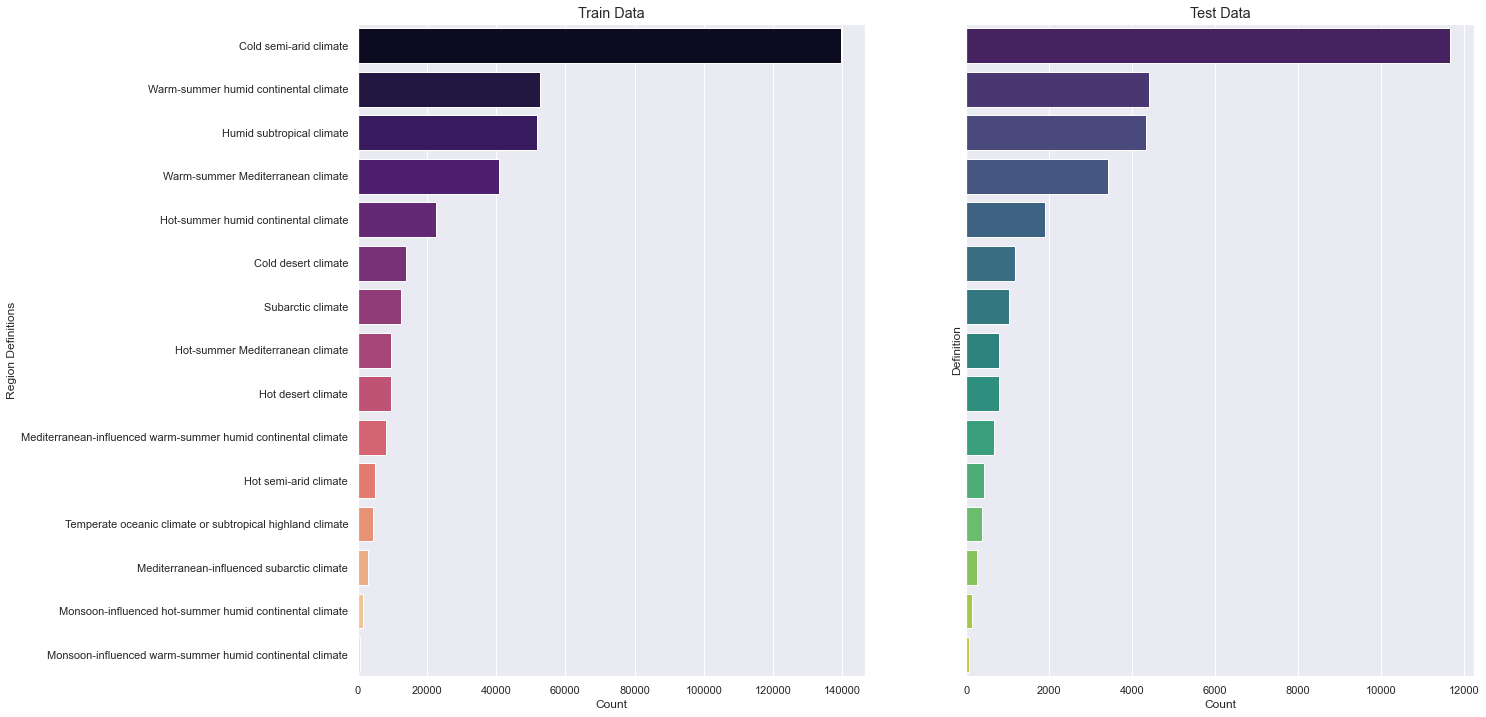

In [31]:
# Set up figure size
fig, ax = plt.subplots(1,2, figsize=(20,12))

# Draw barplots
sns.barplot(data=regions_train, x="Count", y="Definition", palette='magma', ax=ax[0])
sns.barplot(data=regions_test, x="Count", y="Definition", palette='viridis', ax=ax[1])

# Add descriptions
ax[0].set_title('Train Data', fontsize = 'large')
ax[1].set_title('Test Data', fontsize = 'large')

ax[0].set_ylabel('Region Definitions')
ax[1].set_yticks([])

# Display plot
plt.show()

Result:
- Data points of cold semi-arid climate are dominant in this dataset - 37%. 

Note: a semi-arid climate, a semi-desert climate, or steppe climate is a dry climate sub-type. It is located on regions that receive precipitation below potential evapotranspiration, but not as low as a desert climate. 

- On the second and third place are Warm-summer humid continental and Humid subtropical climates, which take almost 14% of data points each.

### Temperature in Different Regions

Let's see how Temperature is distributed by Regions on histplots.

Note: Temperature here is the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date (target variable).

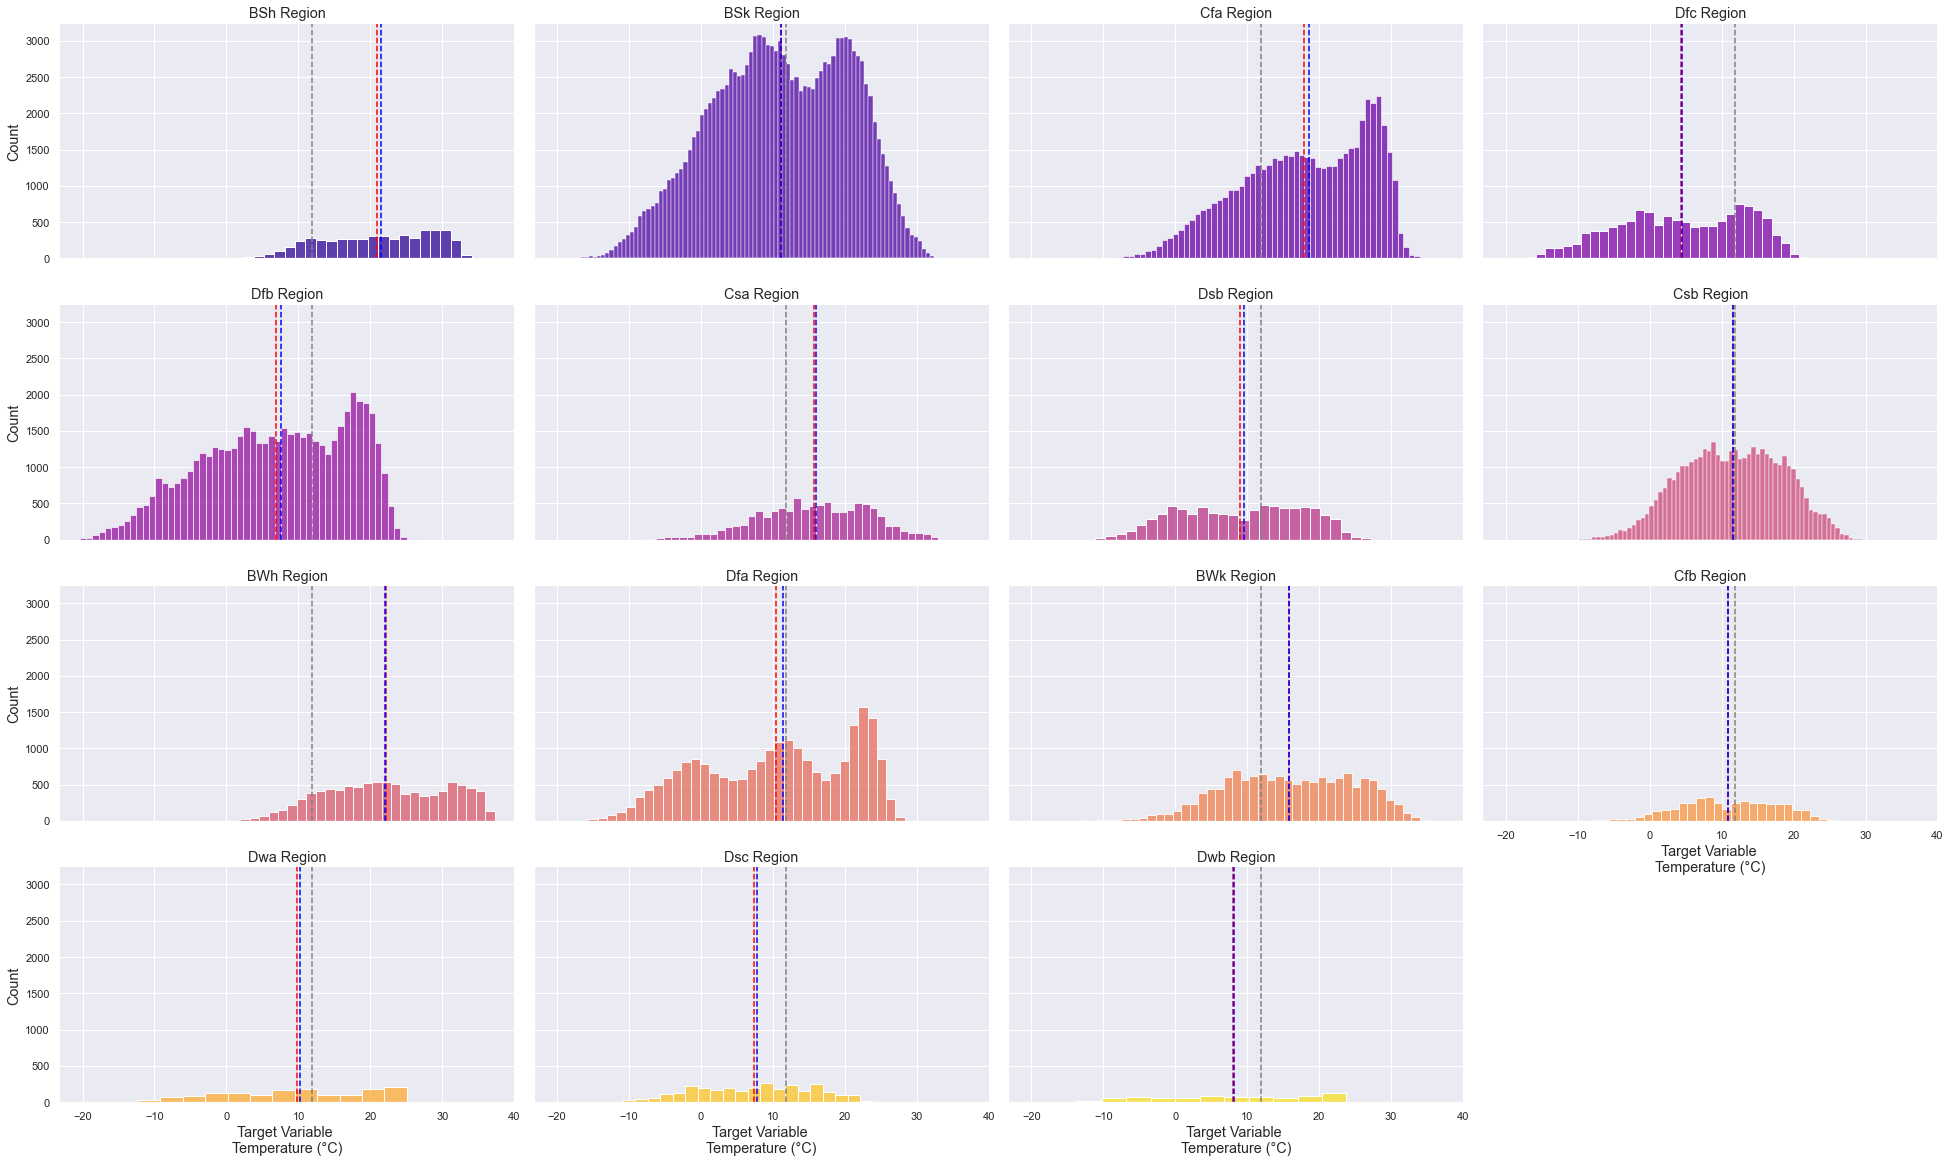

In [32]:
# Set up the facet grid
g = sns.FacetGrid(
    train_data, 
    col="climateregions__climateregion", 
    height=4, 
    aspect=1.7, 
    col_wrap=4,
    palette='plasma', 
    hue='climateregions__climateregion')

# Pass data to the plot
g.map_dataframe(sns.histplot, x='contest-tmp2m-14d__tmp2m')
# Draw the target mean for reference
g.refline(x=train_data['contest-tmp2m-14d__tmp2m'].mean())
# Draw the mean of each region for reference
g.map(lambda x, **kwargs: plt.axvline(x.mean(), color="red", linestyle="dashed"), 'contest-tmp2m-14d__tmp2m')
g.map(lambda x, **kwargs: plt.axvline(x.median(), color="blue", linestyle="dashed"), 'contest-tmp2m-14d__tmp2m')

# Add descriptions
g.set_titles(template="{col_name} Region", size = 'large')
g.set_axis_labels('Target Variable \nTemperature (°C)', 'Count', fontsize = 'large')

# Show the result
plt.show()

Results: 
- There are no visible outliers;
- Target's mean is located around 10 °C.

- `Bsh` (Hot semi-arid climate), `Cfa` (Humid subtropical climate), `Dfb` (Warm-summer humid continental climate), `Dfa` (Hot-summer humid continental climate) and `Dsb` (Mediterranean-influenced warm-summer humid continental climate) skewed to the left (have more high temperatures within, than low ones) a bit more significantly than the others.
- Most regions have simmetric histograms.

- `Bsk` (Cold semi-arid climate) has a clear bimodal distribution;
- `Cfa` (Humid subtropical climate) and `Dfb` (Warm-summer humid continental climate) have distribution fairly close to bimodal;
- `Dfa` (Hot-summer humid continental climate) has multimodal distribution;
- Most of the rest might be close to bimodality, but it's hard to tell with certainty due to the low amount of data points within some regions. 


Let's check how regional temperatures will look like on the violin plot. 

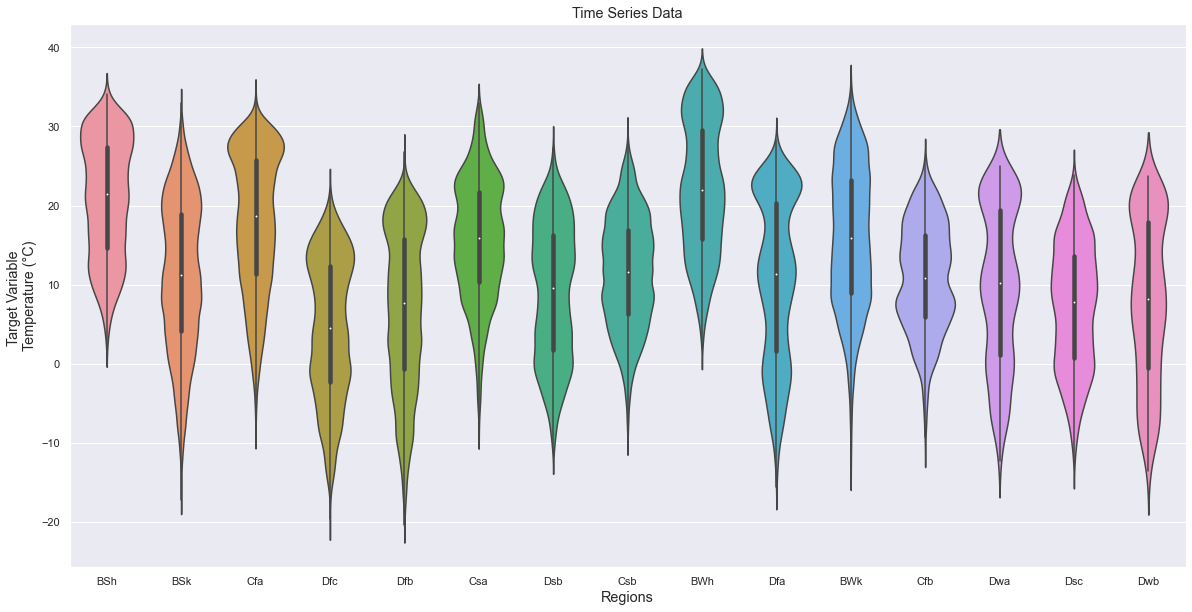

In [33]:
# Set up the grid
fig,ax= plt.subplots(1,1, figsize=(20,10))

# Pass data to the plot
ax = sns.violinplot(x=train_data['climateregions__climateregion'], y=train_data['contest-tmp2m-14d__tmp2m'])

# Add descriptions
ax.set_title('Time Series Data', fontsize = 'large')
ax.set_ylabel(ylabel = 'Target Variable \nTemperature (°C)', fontsize = 'large')
ax.set_xlabel('Regions', fontsize = 'large')

# Show the result
plt.show()

Results: 
- Still no visible outliers, but `BWk` (Cold desert climate) "tail" of values is proportionally longer compared to other regions.
- `BWh` (Hot desert climate) has the warmest temperatures and `Dfc` (Subarctic climate) - coldest.

Let's check the mean tempreratures for those climate regions. 

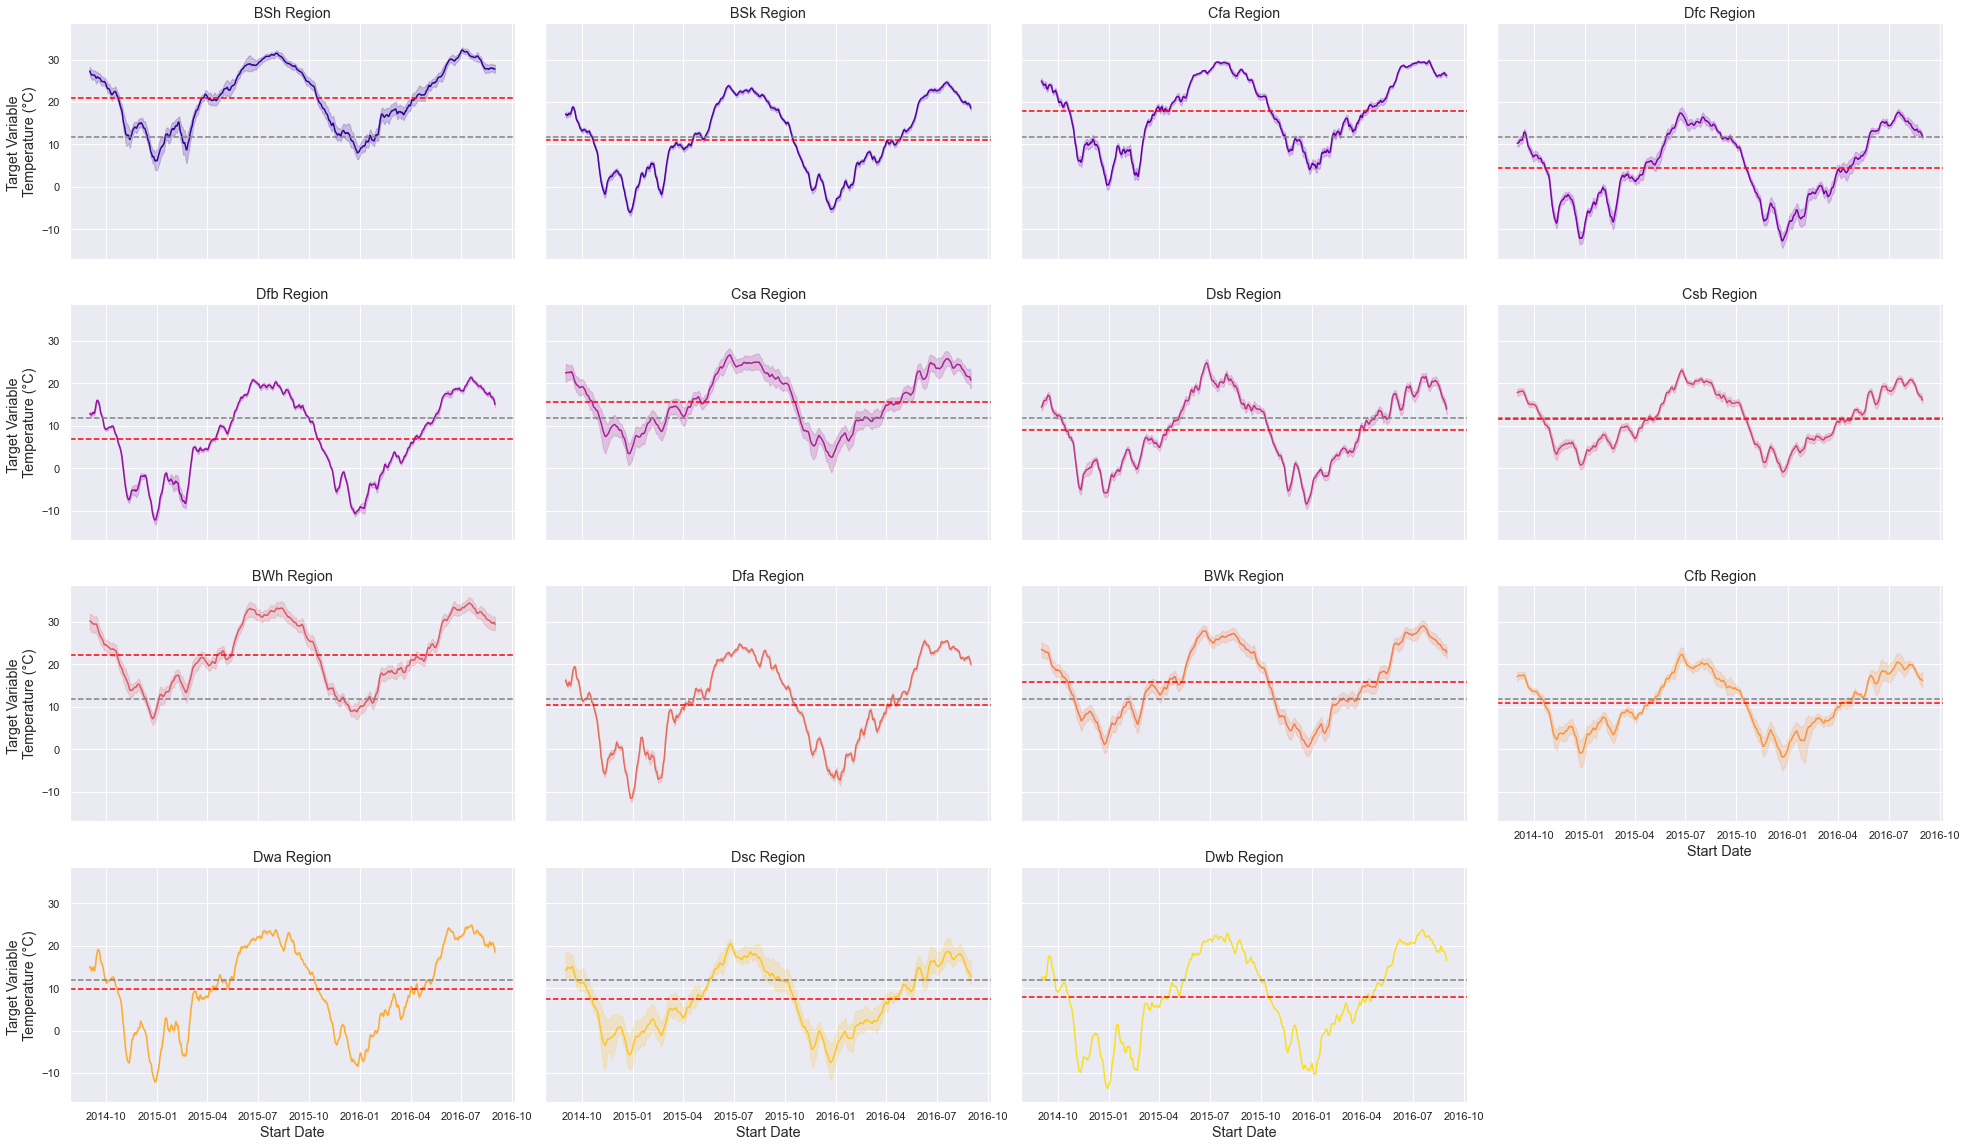

In [34]:
# Set up the facet grid
g = sns.FacetGrid(
    train_data, 
    col="climateregions__climateregion", 
    height=4, 
    aspect=1.7, 
    col_wrap=4,
    palette='plasma', 
    hue='climateregions__climateregion')

# Pass data to the plot
g.map_dataframe(sns.lineplot, x="startdate", y="contest-tmp2m-14d__tmp2m")
# Draw the target mean for reference
g.refline(y=train_data["contest-tmp2m-14d__tmp2m"].mean())
# Draw the mean of each region for reference
g.map(lambda x, **kwargs: plt.axhline(x.mean(), color="red", linestyle="dashed"), 'contest-tmp2m-14d__tmp2m')

# Add descriptions
g.set_titles(template="{col_name} Region", size = 'large')
g.set_axis_labels('Start Date', 'Target Variable \nTemperature (°C)', fontsize = 'large')

# Show the result
plt.show()

Result:
- `BWh` (Hot desert climate) and `Bsh` (Hot semi-arid climate) have the highest average temperatures.
- `Dfc` (Subarctic climate) and `Dfb` (Warm-summer humid continental climate) have the lowest average temperatures.
- Seasonal pattern is pretty similar for all regions. 

### Temperature Relationship with Precipitation and Humidity

Let's start by putting all averages of the target variable by regions on one graph to see the pattern clearly.

Note: Temperature here is the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date (target variable).

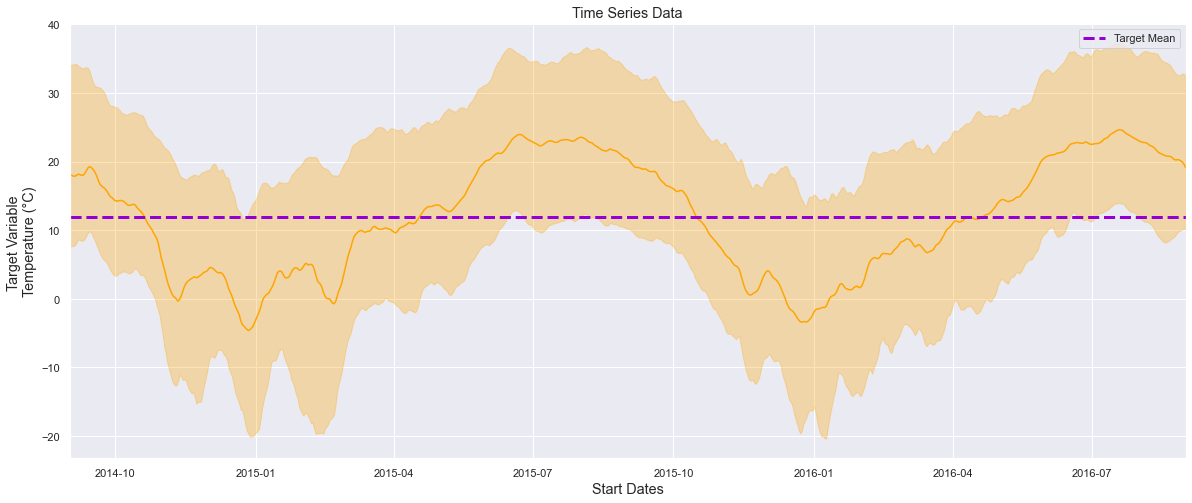

In [35]:
# Set up grid
fig, ax = plt.subplots(1,1, figsize=(20,8))

# Calculate necessary statistics for the plot
aggr = train_data.groupby('startdate').agg({'contest-tmp2m-14d__tmp2m': ['min', 'max', 'mean']}).reset_index()

# Pass data to the temperature plot
ax1 = sns.lineplot(
    x=aggr['startdate'], 
    y=aggr.loc[:,('contest-tmp2m-14d__tmp2m','mean')], 
    color='orange')
# Fill the space between statistics with color
ax1.fill_between(
    aggr['startdate'], 
    aggr.loc[:,('contest-tmp2m-14d__tmp2m', 'min')], 
    aggr.loc[:,('contest-tmp2m-14d__tmp2m', 'max')], 
    alpha=.3, 
    color='orange')

# Set up plot limits
start_end = [train_data['startdate'].min(), train_data['startdate'].max()]
ax1.set_xlim(start_end)

# Plot the target mean above
ax_precipitation = sns.lineplot(
    x=start_end, 
    y=[train_data["contest-tmp2m-14d__tmp2m"].mean(), train_data["contest-tmp2m-14d__tmp2m"].mean()], 
       color='darkviolet', 
       linewidth = 3,
       linestyle='--',
       label='Target Mean')

# Add descriptions
ax1.set_title('Time Series Data', fontsize = 'large')
ax1.set_ylabel(ylabel = 'Target Variable \nTemperature (°C)', fontsize = 'large')
ax1.set_xlabel('Start Dates', fontsize = 'large')

# Display the result
plt.show()

Now let's add relative humidity and precipitation to the graph and see how they play with each other. 

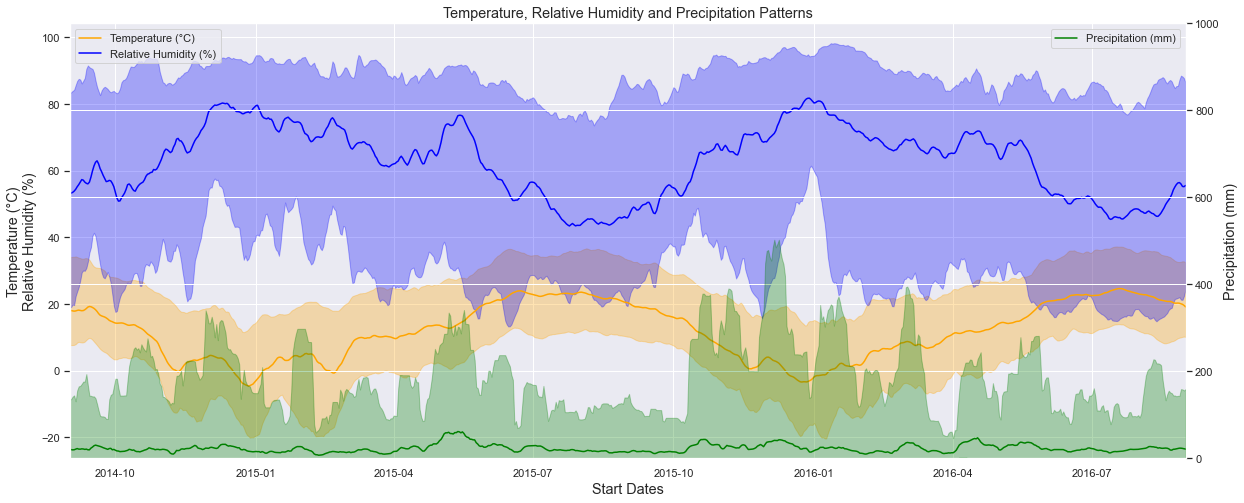

In [36]:
# Slice data for plot
train_data_sub1 = train_data[[
    'startdate', 
    'contest-tmp2m-14d__tmp2m', 
    'contest-rhum-sig995-14d__rhum', 
    'contest-precip-14d__precip', 
    'elevation__elevation'
    ]]

# Set up grid
fig, ax = plt.subplots(1,1, figsize=(20,8))

def plot_line(data, var, color, label, ax=None):

    # Calculate necessary statistics for the plot
    aggr = data.groupby('startdate').agg({var: ['min', 'max', 'mean']}).reset_index()

    # Pass data to the temperature plot
    plot_line = sns.lineplot(
        x=aggr['startdate'], 
        y=aggr.loc[:,(var, 'mean')], 
        color=color,
        label=label,
        ax=ax)
    
    # Fill the space between statistics with color
    plot_line.fill_between(
        aggr['startdate'], 
        aggr.loc[:,(var, 'min')], 
        aggr.loc[:,(var, 'max')], 
        alpha=.3, 
        color=color)
    return plot_line

 
# Pass data for the plots
ax = plot_line(train_data_sub1, var='contest-tmp2m-14d__tmp2m', color='orange', label='Temperature (°C)', ax=ax)
ax = plot_line(train_data_sub1, var='contest-rhum-sig995-14d__rhum', color='blue', label='Relative Humidity (%)', ax=ax)
ax_precipitation = ax.twinx()
ax_precipitation = plot_line(train_data_sub1, var='contest-precip-14d__precip', color='green', label='Precipitation (mm)', ax=ax_precipitation)


# Set up plots limits
start_end = [train_data['startdate'].min(), train_data['startdate'].max()]
ax.set_xlim(start_end)

# Add descriptions
ax.set_title('Temperature, Relative Humidity and Precipitation Patterns', fontsize = 'large')
ax.set_ylabel(ylabel = 'Temperature (°C)\nRelative Humidity (%)', fontsize = 'large')
ax.set_xlabel('Start Dates', fontsize = 'large')
ax.legend(loc='upper left')
ax_precipitation.set_ylabel(ylabel = 'Precipitation (mm)', fontsize = 'large')
ax_precipitation.legend(loc='upper right')
ax_precipitation.set_ylim([0, 1000])

# Display the result
plt.show()

We also might consider plotting a LOWESS (Locally Weighted Scatterplot Smoothing) smoother over our data points. This will draw a line through the approximate average.

Note: When there are too many data points to visualize, one thing we can do is take a random subset of the data. This will mean fewer dots and because it is a random subset, it should still be approximately generalizable to the full dataset. We'll use `10%` of data.

In [37]:
# Slice data to improve visualisation quality
perc = 0.1
train_data_sub2 = train_data_sub1.sample(n = int(train_data_sub1.shape[0]*perc))

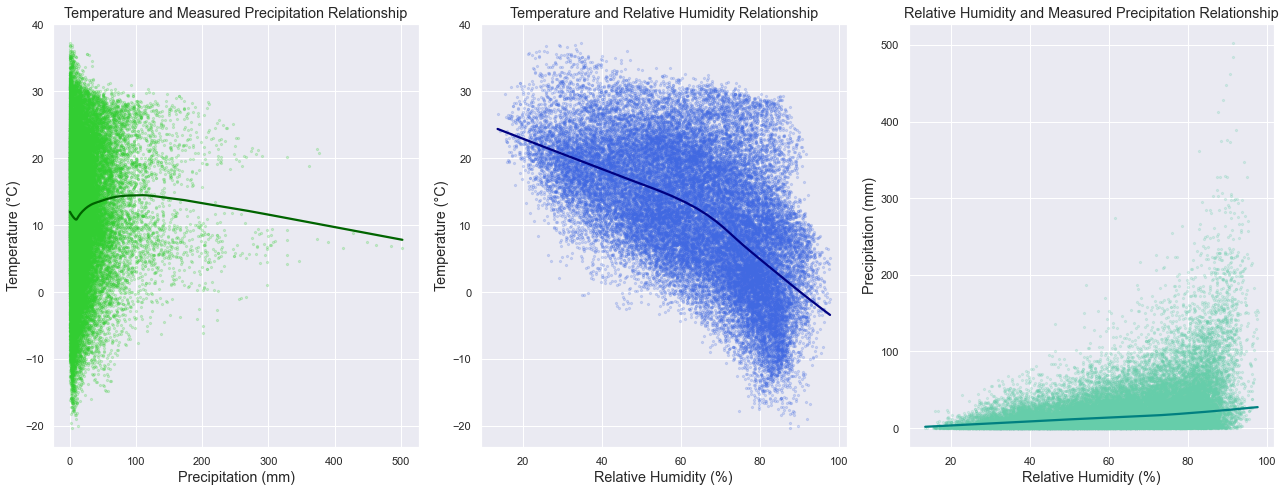

In [38]:
def draw_regplot(charts):

    # Set up layout
    fig, axes = plt.subplots(1,len(charts), figsize=(18,7))
    charts_and_axes = zip(charts, axes)

    for chart, ax in charts_and_axes:  
        sns.regplot(
            x=chart['x'],
            y=chart['y'],
            data = train_data_sub2,
            lowess=True,
            scatter_kws={'color': chart['colors'][0], 'alpha': 0.2, 's': 5},
            line_kws={'color': chart['colors'][1]},
            ax=ax)
        
        # Set up titles
        ax.set_title(chart['title'], fontsize='large')
        
        # Set up labels
        ax.set_xlabel(chart['x_label'], fontsize='large')
        ax.set_ylabel(chart['y_label'], fontsize='large')

    # Show the result
    fig.tight_layout()

    return plt.show()

draw_regplot([
    {
        'title': 'Temperature and Measured Precipitation Relationship',
        'x': 'contest-precip-14d__precip',
        'y': 'contest-tmp2m-14d__tmp2m',
        'x_label': 'Precipitation (mm)',
        'y_label': 'Temperature (°C)',
        'colors': ['limegreen', 'darkgreen'],
    },
    {
        'title': 'Temperature and Relative Humidity Relationship',
        'x': 'contest-rhum-sig995-14d__rhum',
        'y': 'contest-tmp2m-14d__tmp2m',
        'x_label': 'Relative Humidity (%)',
        'y_label': 'Temperature (°C)',
        'colors': ['royalblue', 'navy'],
    },
    {
        'title': 'Relative Humidity and Measured Precipitation Relationship',
        'x': 'contest-rhum-sig995-14d__rhum',
        'y': 'contest-precip-14d__precip',
        'x_label': 'Relative Humidity (%)',
        'y_label': 'Precipitation (mm)',
        'colors': ['MediumAquaMarine', 'Teal'],
    },
])

Though the individual points are more difficult to read, the line gives us clear information about the relationship between these two features.

### Elavation Relationships with Temperature, Humidity and Precipitation

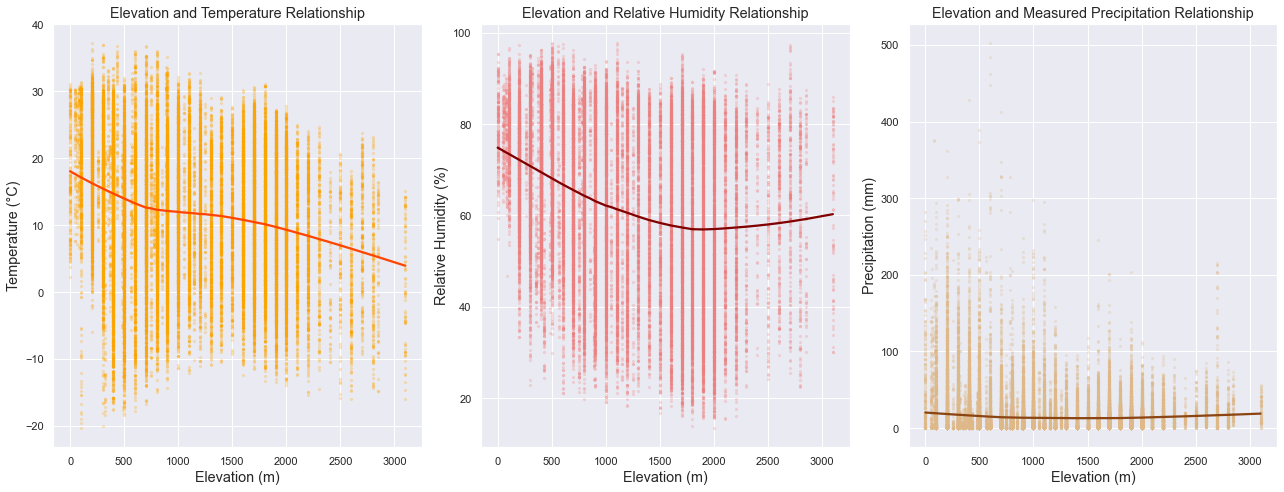

In [39]:
draw_regplot([
    {
        'title': 'Elevation and Temperature Relationship',
        'x': 'elevation__elevation',
        'y': 'contest-tmp2m-14d__tmp2m',
        'x_label': 'Elevation (m)',
        'y_label': 'Temperature (°C)',
        'colors': ['Orange', 'OrangeRed'],
    },
    {
        'title': 'Elevation and Relative Humidity Relationship',
        'x': 'elevation__elevation',
        'y': 'contest-rhum-sig995-14d__rhum',
        'x_label': 'Elevation (m)',
        'y_label': 'Relative Humidity (%)',
        'colors': ['LightCoral', 'Maroon'],
    },
    {
        'title': 'Elevation and Measured Precipitation Relationship',
        'x': 'elevation__elevation',
        'y': 'contest-precip-14d__precip',
        'x_label': 'Elevation (m)',
        'y_label': 'Precipitation (mm)',
        'colors': ['BurlyWood', 'SaddleBrown'],
    },
])

Finally, let's find correlations in numbers.

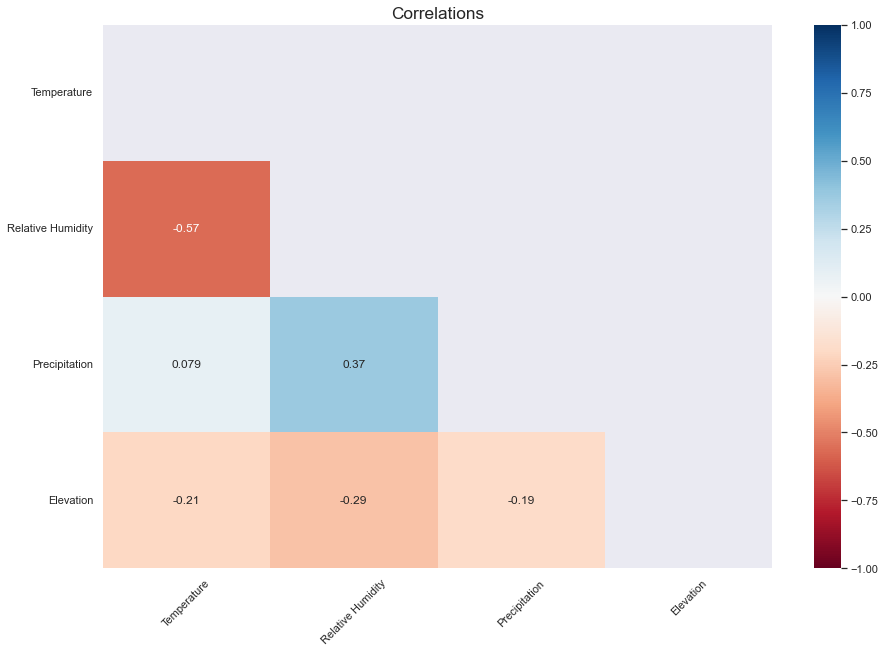

In [40]:
def visualise_heatmap(dataset_corr, title, ticks, cmap):
    # Prepare figure
    plt.figure(figsize = (15,10))

    # Draw heatmap as triangle
    mask = np.triu(np.ones_like(dataset_corr, dtype=bool))
    # Plot heatmap
    ax = sns.heatmap(dataset_corr, annot=True, vmax=1, vmin=-1, cmap=cmap, mask=mask)

    
    # Add descriptions
    plt.title(title, fontsize= 'x-large')
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks)

    plt.xticks(rotation=45)

    
    return plt.show()

visualise_heatmap(
    train_data_sub1.corr(), 
    title='Correlations', 
    ticks=['Temperature','Relative Humidity','Precipitation','Elevation'], 
    cmap='RdBu')

Result: 
- Elevation has *small negative correlation*  with temperature and relative humidity:`-0.21` and `-0.29` respectively.
- Temperature has *large negative correlation* `-0.57` with relative humidity. 
- Measured precipitation and relative humidity have *medium positive correlation* `0.37`.


Or in other words: 
- When the **temperature is high** and **humidity is low** the probability of **precipitations is low**. 
- When the **temperature is low**, but **humidity is high** the probability of **precipitations is high**.
- The **temperature** as well as **relative humidity** on **higher altitudes tends to be lower**, and there is also **less precipitation** there.

### Unique Locations

Data points of each region are located on a certain latitude and longitude, let's see how many of them are there. 

In [41]:
dp_by_region_train = train_data.groupby(['climateregions__climateregion', 'lat', 'lon']).size().to_frame('data_ponts_count').reset_index(drop=False)
dp_by_region_train

,climateregions__climateregion,lat,lon,data_ponts_count
0,BSh,0.000000,0.833333,731
1,BSh,0.136364,0.733333,731
2,BSh,0.136364,0.766667,731
3,BSh,0.181818,0.733333,731
4,BSh,0.181818,0.766667,731
...,...,...,...,...
509,Dsc,0.954545,0.100000,731
510,Dsc,1.000000,0.100000,731
511,Dwa,0.727273,0.733333,731
512,Dwa,0.727273,0.766667,731


Result: there are 731 data points within each `latitude-longitude-region` combination. 

Are there any other values besides 731 within this table? 
And how many such combinations we have? 

In [42]:
dp_by_region_train.data_ponts_count.describe()

count    514.0
mean     731.0
std        0.0
min      731.0
25%      731.0
50%      731.0
75%      731.0
max      731.0
Name: data_ponts_count, dtype: float64

Result: 
- We have 514 latitude-longitude-region combinations or, in other words, there are 514 unique locations. That basically means that each region in a training dataset contains batches of data points, 731 data points in each batch, which was visible from the table a bit earlier.

Let's do the same for testing set.

In [43]:
dp_by_region_test = test_data.groupby(['climateregions__climateregion', 'lat', 'lon']).size().to_frame('data_ponts_count').reset_index(drop=False)
dp_by_region_test

,climateregions__climateregion,lat,lon,data_ponts_count
0,BSh,0.000000,0.833333,61
1,BSh,0.136364,0.733333,61
2,BSh,0.136364,0.766667,61
3,BSh,0.181818,0.733333,61
4,BSh,0.181818,0.766667,61
...,...,...,...,...
509,Dsc,0.954545,0.100000,61
510,Dsc,1.000000,0.100000,61
511,Dwa,0.727273,0.733333,61
512,Dwa,0.727273,0.766667,61


In [44]:
dp_by_region_test.data_ponts_count.describe()

count    514.0
mean      61.0
std        0.0
min       61.0
25%       61.0
50%       61.0
75%       61.0
max       61.0
Name: data_ponts_count, dtype: float64

Result: 
- We have presumably the same 514 latitude-longitude-region combinations.
- But each location contains 61 data points within it. 

Let's put unique locations on the plot to understand how it might look.

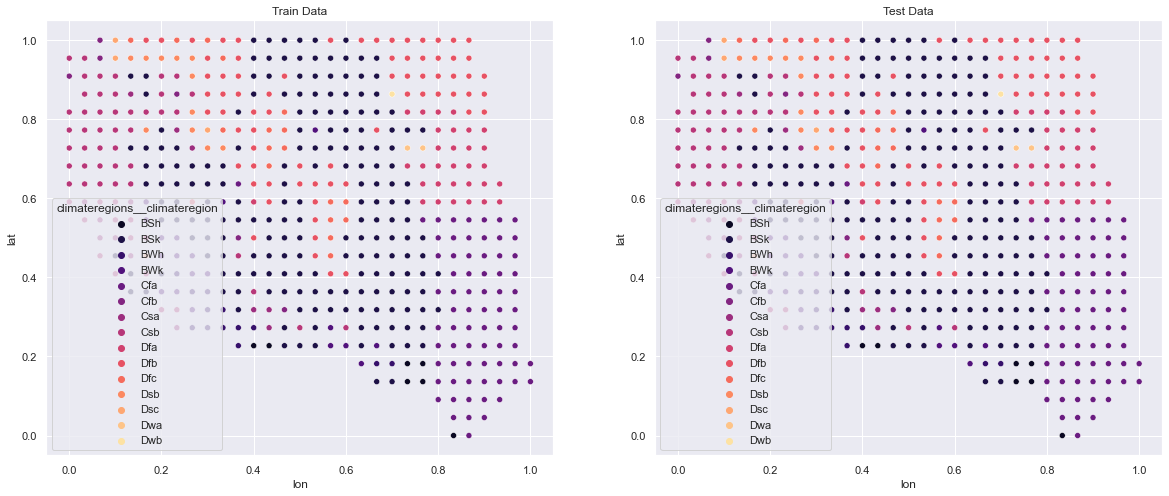

In [45]:
# Set up figures
fig, ax = plt.subplots(1,2, figsize=(20,8))

# Draw scatterplots
sns.scatterplot(data=dp_by_region_train, y='lat', x='lon', hue='climateregions__climateregion', palette='magma', ax=ax[0])
sns.scatterplot(data=dp_by_region_test, y='lat', x='lon', hue='climateregions__climateregion', palette='magma', ax=ax[1])

# Add descriptions
ax[0].set_title('Train Data')
ax[1].set_title('Test Data')

# Display plots
plt.show()

Result: the pattern of regions distribution by locations looks very similar for training and testing set, what suggests that they might actually use the same locations to collect data for both sets, just did it in different time frames. 

Let's check whether we have the same locations in training and tesing sets, or some of them differ. To do that we are going to combine both datasets and group their latitudes and longitudes to understand how many such combinations we have and how many data points each of them has in result.  

In [46]:
# Concatenate train and test data
concat_set = pd.concat([train_data, test_data], axis=0).groupby(['lat', 'lon']).size().to_frame('data_points_count').reset_index(drop=False)
concat_set

,lat,lon,data_points_count
0,0.000000,0.833333,792
1,0.000000,0.866667,792
2,0.045455,0.833333,792
3,0.045455,0.866667,792
4,0.045455,0.900000,792
...,...,...,...
570,1.000000,0.733333,792
571,1.000000,0.766667,792
572,1.000000,0.800000,792
573,1.000000,0.833333,792


Result: 
- It seems that the number of locations has increased from 514 to 575, but it is a bit odd. In most cases the latitude from training set had the identical latitude from testing set and the same goes for longitude. 
- Number of data points for each combination of longitude and latitude has increased and became 792 (731 + 61), which means in most cases a batch of data points from testing was added to the batch of training.

Let's check how unmached latitudes and longitudes look like. We can do that by filtering out combinations that have the initial 731 data point and 61. 

In [47]:
unm_731 = concat_set[concat_set.data_points_count == 731][:5]
unm_731


,lat,lon,data_points_count
33,0.227273,0.366667,731
34,0.227273,0.400000,731
35,0.227273,0.433333,731
36,0.227273,0.466667,731
37,0.227273,0.500000,731


In [48]:
unm_61 = concat_set[concat_set.data_points_count == 61][:5]
unm_61

,lat,lon,data_points_count
52,0.227273,0.366667,61
53,0.227273,0.400000,61
54,0.227273,0.433333,61
55,0.227273,0.466667,61
56,0.227273,0.500000,61


Result: the stange thing is that latitude and longitude value pairs look identical for both datasets. Yet they do not match. 

Let's check whether the machine considers them the same. 

In [49]:
print('Are latitude values the same for 5 rows from unm_731 and unm_61?', unm_731.lat.equals(unm_61.lat)) 
print('Are longitudes the same?', unm_731.lon.equals(unm_61.lon))

Are latitude values the same for 5 rows from unm_731 and unm_61? False
Are longitudes the same? False


Result: the machine do not consider them the same, which means that the values are different in the initial `csv` file, yet are troncated and shown here like the same. 

We could probably troncate the values to 6 decimal places, because according to the wiki page it will give us essentially the same location (https://wiki.openstreetmap.org/wiki/Precision_of_coordinates).

In [50]:
train_data.lat = train_data.lat.round(6)
train_data.lon = train_data.lon.round(6)
test_data.lat = test_data.lat.round(6)
test_data.lon = test_data.lon.round(6)
train_data.head(3)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

Let's check whether locations match now. 

In [51]:
pd.concat([train_data, test_data], axis=0).groupby(['lat', 'lon']).size()

lat       lon     
0.000000  0.833333    792
          0.866667    792
0.045455  0.833333    792
          0.866667    792
          0.900000    792
                     ... 
1.000000  0.733333    792
          0.766667    792
          0.800000    792
          0.833333    792
          0.866667    792
Length: 514, dtype: int64

Result: 
- All locatins are matched. 
- There are 514 of them. 

What about the fluctuation of daily average temperaturues on day to day basis for all locations? Let's see how they look for target variable. 

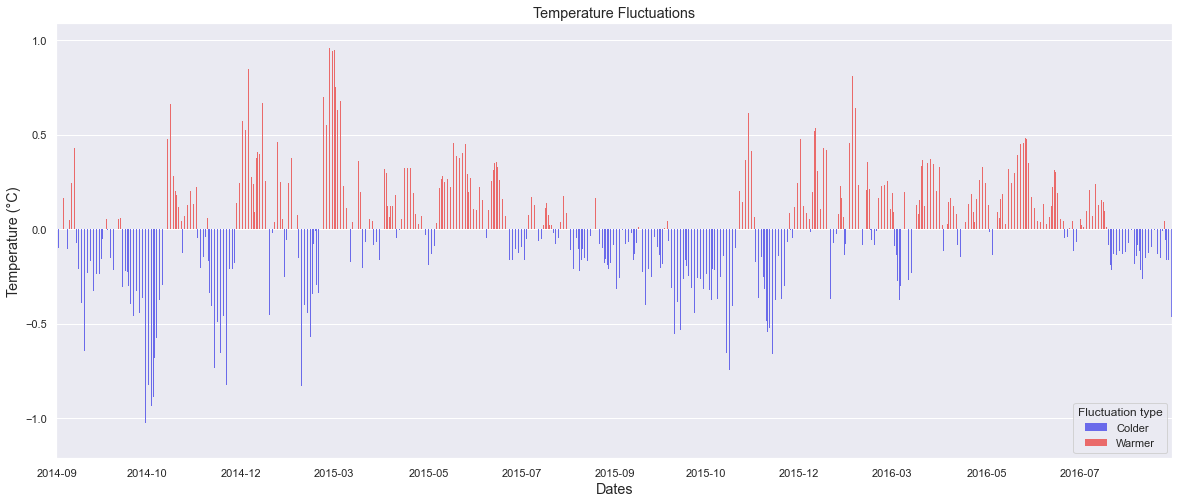

In [52]:
# Agregate average temperatures by startdate
target_diff = train_data_sub1.groupby('startdate', as_index=False).agg({ 'contest-tmp2m-14d__tmp2m': 'mean' })
# Find the difference by subtracting the previous day's target from the current one
target_diff['contest-tmp2m-14d__tmp2m_diff'] = target_diff['contest-tmp2m-14d__tmp2m'] - target_diff['contest-tmp2m-14d__tmp2m'].shift(1)
# Categorise fluctuations 
target_diff['Fluctuation type'] = np.where(target_diff['contest-tmp2m-14d__tmp2m_diff'] > 0, 'Warmer', 'Colder')
# Remove the 1st data point that has no value for subtraction
target_diff = target_diff[1:]

# Set up grid
fig, ax = plt.subplots(1,1, figsize=(20,8))
# Pass data to the plot
ax = sns.barplot(
    x=target_diff['startdate'], 
    y=target_diff['contest-tmp2m-14d__tmp2m_diff'], 
    hue=target_diff['Fluctuation type'],
    edgecolor="none", 
    palette='seismic'
)
# Inport related to ticks
import matplotlib.dates as mdates
# Set up ticks
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 3, 5, 7, 9, 11)))
ax.xaxis.set_major_formatter(lambda x, pos: target_diff['startdate'].iloc[int(x)].strftime('%Y-%m'))

# Add descriptions
ax.set_title('Temperature Fluctuations', fontsize = 'large')
ax.set_ylabel(ylabel = 'Temperature (°C)', fontsize = 'large')
ax.set_xlabel('Dates', fontsize = 'large')

# Display the result
plt.show()

Looks like fluctuations towards both colder and warmer temperatures became less drastic on average with years going forward. Let's check that. 

In [53]:
target_diff[:365]['contest-tmp2m-14d__tmp2m_diff'].std()

0.33631607931450247

In [54]:
target_diff[365:]['contest-tmp2m-14d__tmp2m_diff'].std()

0.26149579860182465

Result: The period **2014-09 - 2015-08** has seen more variation in temperature deltas (`std` **0.33**) than the period **2015-09 - 2016-08** (`std` **0.26**).

## Conclusion

- We've inspected data at hand and corrected some formats;
- Compared predictions of physical models (Temperature, Measured Precipitation) from training and testing set. 
- Investigated and compared temperature changes by regions.
- Checked relationships between such variables as Temperature, Measured Precipitation, Relative Humidity and Elevation. 
- Investigated locations issue and truncated the locations values from training and testing sets for them to match properly. 
- Checked daily temperature fluctuations averaged for all locations. 

Avenues for analysis and further research: Worth checking and visualizing the temperature fluctuations for particular regions or by locations. 

With regard to feature selection, one might say that the dataset is fairy complicated and there are no obvious clues on how to manually select features without proper domain knowledge. One obvious issue for potential feature selection that we've been able to find is increase of temperatures in the testing set, compared to training set due to climate change. This issue should be addressed during models selection and set up as well as the final model should be adequately protected from data drift. 

Considering the unknowns we are going to start with gradient boosting model, specifically CatBoost (https://arxiv.org/abs/1810.11363) and for feature selection we are going to apply Bayesian optimization strategy (https://en.wikipedia.org/wiki/Bayesian_optimization). 


#### References

- https://www.kaggle.com/code/iamleonie/wids-datathon-2023-forecasting-with-lgbm/notebook
- https://www.kaggle.com/code/khsamaha/eda-wids-datathon-2023
- https://www.kaggle.com/code/flaviafelicioni/wids-2023-different-locations-train-test-solved